### KvN Methods

Solving the IVP

$\frac{\partial x}{\partial t} = -x^2,$ with $x(0)=1$

using Koopman von Neumann methods.


The following code uses a delta distribution as the initial state

In [2]:
import numpy as np
import KvN_tools as kvn

Initializing the state


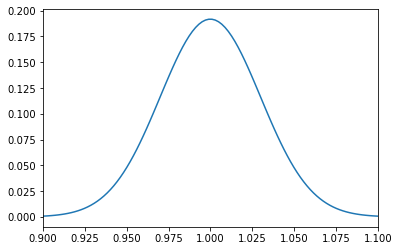

Generating the Hamiltonian
Exponetiating the Hamiltonian
Time evolution


100%|██████████| 1499/1499 [00:00<00:00, 3054.22it/s]


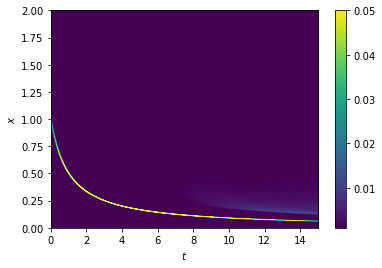

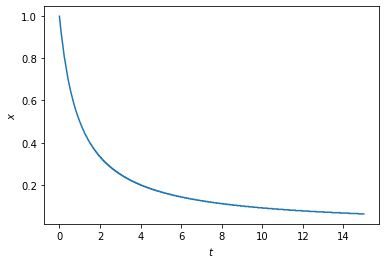

In [8]:
# Set up the grid
n_qubits = 10
n_grid = 2**n_qubits
grid_extent = (0,2)
x = np.linspace(*grid_extent, n_grid)

# Set up time
n_steps = 1500
delta = 0.01
t = np.linspace(0, n_steps*delta, n_steps)

# Set up the initial state (delta in this case)
psi = kvn.psi0(x, 1, type='gaussian', plot=True)

# Generate the Hamiltonian to solve generic quadratic ODE, 
# i.e. ax^2 + bx + c where a,b,c are in params list
params = (-1,0,0)
#H = kvn.KvN_hamiltonian(x, params)

# Time evolve the state
#psi_store = kvn.time_evolution(H, psi, delta, n_steps)

# Plot the results
#kvn.plot_evolution(x, psi_store, t, save=True)
#kvn.plot_mode(x, psi_store, t, plot_analytical=False, params=(-1,0,0), save=True)
#kvn.plot_std(x, psi_store, t)

H_vec = kvn.KvN_hamiltonian_vec(x, params)
psi_store = kvn.time_evolution(H_vec, psi, delta, n_steps)
kvn.plot_evolution(x, psi_store, t, save=True,  vmax=0.05)
kvn.plot_mode(x, psi_store, t, plot_analytical=False, params=(-1,0,0), save=False)

The following code uses a Gaussian distribution as the initial state

Initializing the state
Generating the Hamiltonian
Exponetiating the Hamiltonian
Time evolution


100%|██████████| 4999/4999 [00:03<00:00, 1531.16it/s]


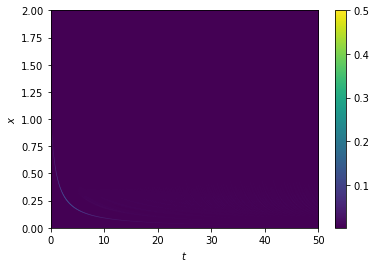

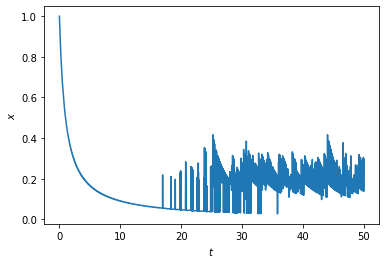

In [10]:
# Set up the grid
n_qubits = 10
n_grid = 2**n_qubits
grid_extent = (0,2)
x = np.linspace(*grid_extent, n_grid)

# Set up time
n_steps = 5000
delta = 0.01
t = np.linspace(0, n_steps*delta, n_steps)

# Set up the initial state (delta in this case)
psi = kvn.psi0(x, 1, type='gaussian', std=0.01, n_bins=50)

# Generate the Hamiltonian to solve generic quadratic ODE, 
# i.e. ax^2 + bx + c where a,b,c are in params list
params = (-1,0,0)
H = kvn.KvN_hamiltonian_vec(x, params)

# Time evolve the state
psi_store = kvn.time_evolution(H, psi, delta, n_steps)

# Plot the results
kvn.plot_evolution(x, psi_store, t, save=True, vmax=0.5)
kvn.plot_mode(x, psi_store, t, save=True)
#kvn.plot_std(x, psi_store, t, log=True, save=True)

### Multidimensional KvN method

where we will try to reproduce the results that describe the Van der Pol oscillator:

$\dot{x} = F_x(x,y) = y$

$\dot{y} = F_y(x,y) = -x + \mu (1-x^2)y$


Generating the Hamiltonian
Exponetiating the Hamiltonian
Time evolution


100%|██████████| 4999/4999 [00:14<00:00, 354.58it/s]


shape of psi_t: (40, 40, 5000)
[[ 0.00000000e+00+0.00000000e+00j -9.84441275e-05+2.94146472e-04j
  -3.44718463e-04+5.66100216e-04j ...  6.14035956e-02-2.57974110e-01j
   5.97983717e-02-2.60489986e-01j  5.74694763e-02-2.61235749e-01j]
 [ 0.00000000e+00+0.00000000e+00j  1.22728269e-04-2.92918601e-04j
   3.75466129e-04-5.58544343e-04j ... -6.70985639e-02-6.38722836e-01j
  -7.37718645e-02-6.44299754e-01j -7.95329758e-02-6.46550279e-01j]
 [ 0.00000000e+00+0.00000000e+00j -1.48826129e-04+2.91723510e-04j
  -4.16388526e-04+5.51830271e-04j ... -2.17759414e-02+4.33368082e-02j
  -3.03913429e-02+6.43468071e-02j -3.84464841e-02+8.36600450e-02j]
 ...
 [ 0.00000000e+00+0.00000000e+00j  2.00850609e-05-3.01754925e-04j
   9.11580075e-05-6.19684535e-04j ...  3.25211994e-01+1.60029669e-01j
   3.17474022e-01+1.38804732e-01j  3.09517371e-01+1.15839782e-01j]
 [ 0.00000000e+00+0.00000000e+00j -4.30279942e-05+2.99723429e-04j
  -1.36323293e-04+6.11576463e-04j ...  6.26640813e-03+1.00294825e-01j
  -1.21586767e-0

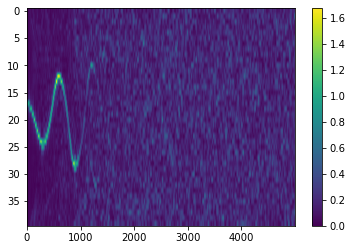

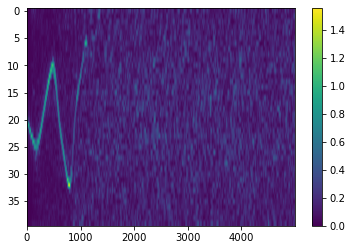

In [2]:
import numpy as np
import KvN_tools_md as kvn_md

mu = 0.5

# Set up the grid
nx = ny = 60
x_extent = (-4,4)
y_extent = (-3,3)
x = np.linspace(*x_extent, nx)
y = np.linspace(*y_extent, ny)


# Set up time
n_steps = 5000
delta = 0.01
t = np.linspace(0, n_steps*delta, n_steps)

# Set up the initial state (delta in this case)
psi = kvn_md.psi0(x, y, 0.5, 0)

# Generate the Hamiltonian
H = kvn_md.KvN_Hamiltonian(x, y, mu)

# Time evolve the state
psi_store = kvn_md.time_evolution(H, psi, t)


# Plot the results
kvn_md.plot_evolution(x, y, psi_store, t)